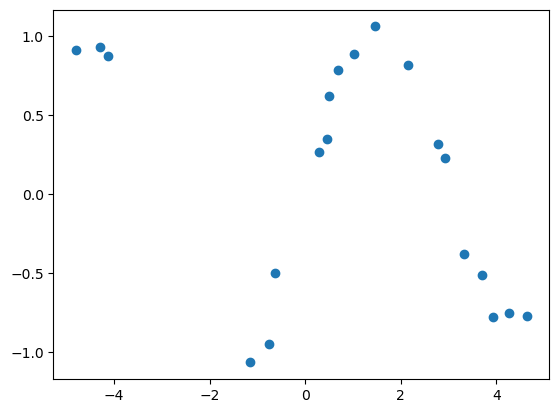

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))
plt.scatter(X,y)

### Fitting the simulated data with the sklearn library's GP

First, we use the sklearn library to see how the curve fits, and the optimal lengthscales and likelihoods.

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the kernel
kernel = RBF(length_scale=1.0)

# Create the GP regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.16)

# Fit the GP to the data
gp.fit(X, y)

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plot the results
plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean - y_std, y_mean + y_std, alpha=0.3, label='Uncertainty',color='green')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale', gp.kernel_)
print('likelihood:',gp.log_marginal_likelihood_value_)


### Fitting the simulated data with the class I created

See how it fits and how it compares to sklearn's. Note that $\sigma_n^2 = \alpha$. Since in the sklearn example I set $\alpha = 0.16$, in order to match that I set $\sigma_n = 0.4$ 

In [ ]:
from GPR import GPR

# Create the GP regressor
signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.4#0.1
gp = GPR("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n)

# Fit the GP to the data
gp.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
y_mean, y_std = gp.predict(X_test)

# Plot the results
plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean.reshape(-1) - y_std.reshape(-1), y_mean.reshape(-1) + y_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale',gp.optimal_params)
print('likelihood:',gp.log_marginal_likelihood())

[1.   2.   2.   0.01]25.86995507383999
[1.   2.   2.   0.01]25.86995507383999
[2.71828183 2.         2.         0.01      ]61.616643247575745
[0.19828815 2.         2.         0.01      ]38.68161272291988
[1.   2.   2.   0.01]25.86995507383999
[0.53900309 2.         2.         0.01      ]27.780085932027887
[1.46516227 2.         2.         0.01      ]29.017758997415445
[0.84143626 2.         2.         0.01      ]25.58739871216702
[0.84923321 2.         2.         0.01      ]25.58074399116142
[0.86672544 2.         2.         0.01      ]25.574209277349873
[0.86814849 2.         2.         0.01      ]25.574183218785905
[0.86937686 2.         2.         0.01      ]25.574221362549668
[0.86814849 2.         2.         0.01      ]25.574183218785905
[0.86814849 5.43656366 2.         0.01      ]78.98733497513061
[0.86814849 0.3965763  2.         0.01      ]46.89619359919817
[0.86814849 2.         2.         0.01      ]25.574183218785905
[0.86814849 1.07800618 2.         0.01      ]29.78266556

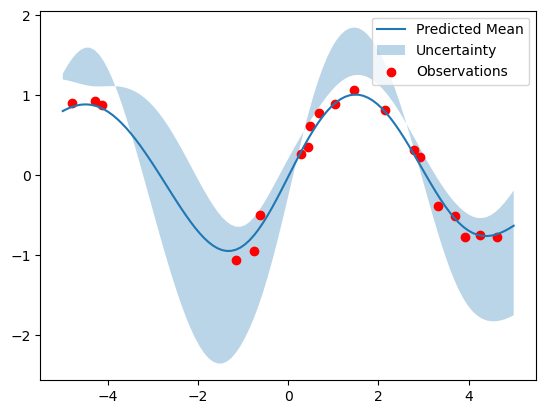

[1.15965158e+000 2.53263665e+002 8.18967485e-003 2.84685672e-138]
-4.57263793008109


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from GPR import GPR

I = 1
val_a = 2
val_b = 2
val_c = 0.01
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

# Generate some random data
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))

# Define the kernel

# Create the GP regressor

signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.4#0.1
gpw = GPR("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

# Fit the GP to the data
gpw.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
yw_mean, yw_std = gpw.predict_original(X_test)

# Plot the results
plt.plot(X_test, yw_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())


In [ ]:

# Get the predicted mean and variance
y_mean, y_std = gpw.predict(X_test)

optimal_params = gpw.optimal_params

fw_norm = 0
for i in range(I):
    fw_norm += optimal_params[3*i+1] * np.tanh(optimal_params[3*i+2] * (y + optimal_params[3*i+3])) 

# Plot the results
plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean.reshape(-1) - y_std.reshape(-1), y_mean.reshape(-1) + y_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], fw_norm, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())